In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('play_tennis.csv')

In [20]:
df

,day,weather,temp,humidity,wind,play
0,D1,sunny,Hot,High,Weak,No
1,D2,sunny,Hot,High,Strong,No
2,D3,cloudy,Hot,High,Weak,Yes
3,D4,rain,Mild,High,Weak,Yes
4,D5,rain,Cool,Normal,Weak,Yes
5,D6,rain,Cool,Normal,Strong,No
6,D7,cloudy,Cool,Normal,Strong,Yes
7,D8,sunny,Mild,High,Weak,No
8,D9,sunny,Cool,Normal,Weak,Yes
9,D10,rain,Mild,Normal,Weak,Yes


In [21]:
# implementing LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [33]:
df

,day,weather,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [34]:
x = df.drop('play', axis=1)
y = df['play']

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz

In [36]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
print(export_text(model, feature_names=list(x.columns)))

|--- weather <= 0.50
|   |--- class: 1
|--- weather >  0.50
|   |--- humidity <= 0.50
|   |   |--- day <= 7.00
|   |   |   |--- class: 0
|   |   |--- day >  7.00
|   |   |   |--- day <= 10.00
|   |   |   |   |--- class: 1
|   |   |   |--- day >  10.00
|   |   |   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- wind <= 0.50
|   |   |   |--- temp <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- temp >  1.00
|   |   |   |   |--- class: 1
|   |   |--- wind >  0.50
|   |   |   |--- class: 1



[Text(0.4, 0.9, 'weather <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = No'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = Yes'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'day <= 7.0\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Yes'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'),
 Text(0.3, 0.3, 'day <= 10.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.8, 0.5, 'wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No'),
 Text(0.7, 0.3, 'temp <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.8, 0.1, 'ent

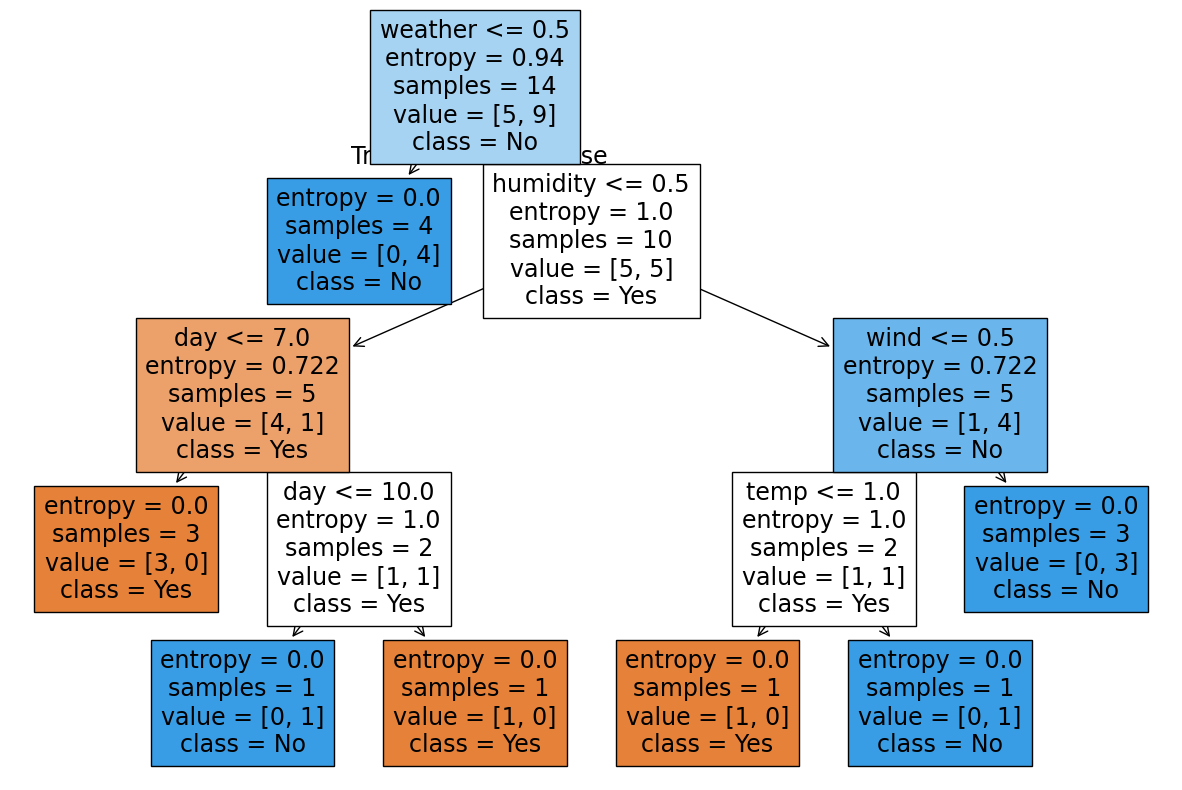

In [39]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Yes', 'No'])

In [15]:
x.columns

Index(['day', 'weather', 'temp', 'humidity', 'wind'], dtype='object')